## visualizing information
personal visualization for evaluation and result summary

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import confusion_matrix
import joblib

In [17]:
PROJECT_ROOT = Path("..")

ARTIFACTS_DIR = PROJECT_ROOT / "results" / "artifacts"

model = joblib.load(ARTIFACTS_DIR / "logreg_model.joblib")
tfidf = joblib.load(ARTIFACTS_DIR / "tfidf.joblib")

X_train, X_test, y_train, y_test = joblib.load(
    ARTIFACTS_DIR / "splits.joblib"
)

In [18]:
y_pred = model.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   24,  3678],
       [  149, 36072]])

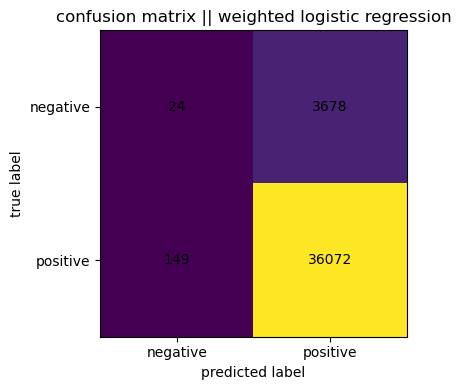

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.imshow(cm)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

ax.set_xticklabels(["negative", "positive"])
ax.set_yticklabels(["negative", "positive"])

ax.set_xlabel("predicted label")
ax.set_ylabel("true label")
ax.set_title("confusion matrix || weighted logistic regression")

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

In [21]:
IMAGES_DIR = PROJECT_ROOT / "images"
IMAGES_DIR.mkdir(exist_ok=True)

output_path = IMAGES_DIR / "confusion_matrix_logreg.png"

plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.xticks([0, 1], ["negative", "positive"])
plt.yticks([0, 1], ["negative", "positive"])
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("confusion matrix || weighted logistic regression")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.savefig(output_path, dpi=150)
plt.close()

output_path


PosixPath('../images/confusion_matrix_logreg.png')